<a href="https://colab.research.google.com/github/MMB019/Projet/blob/main/Corrig%C3%A9e_Mini_projet_DIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#load the dataframe
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/diabetes.csv")

In [ ]:
#print the 10 lines of the dataframe
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


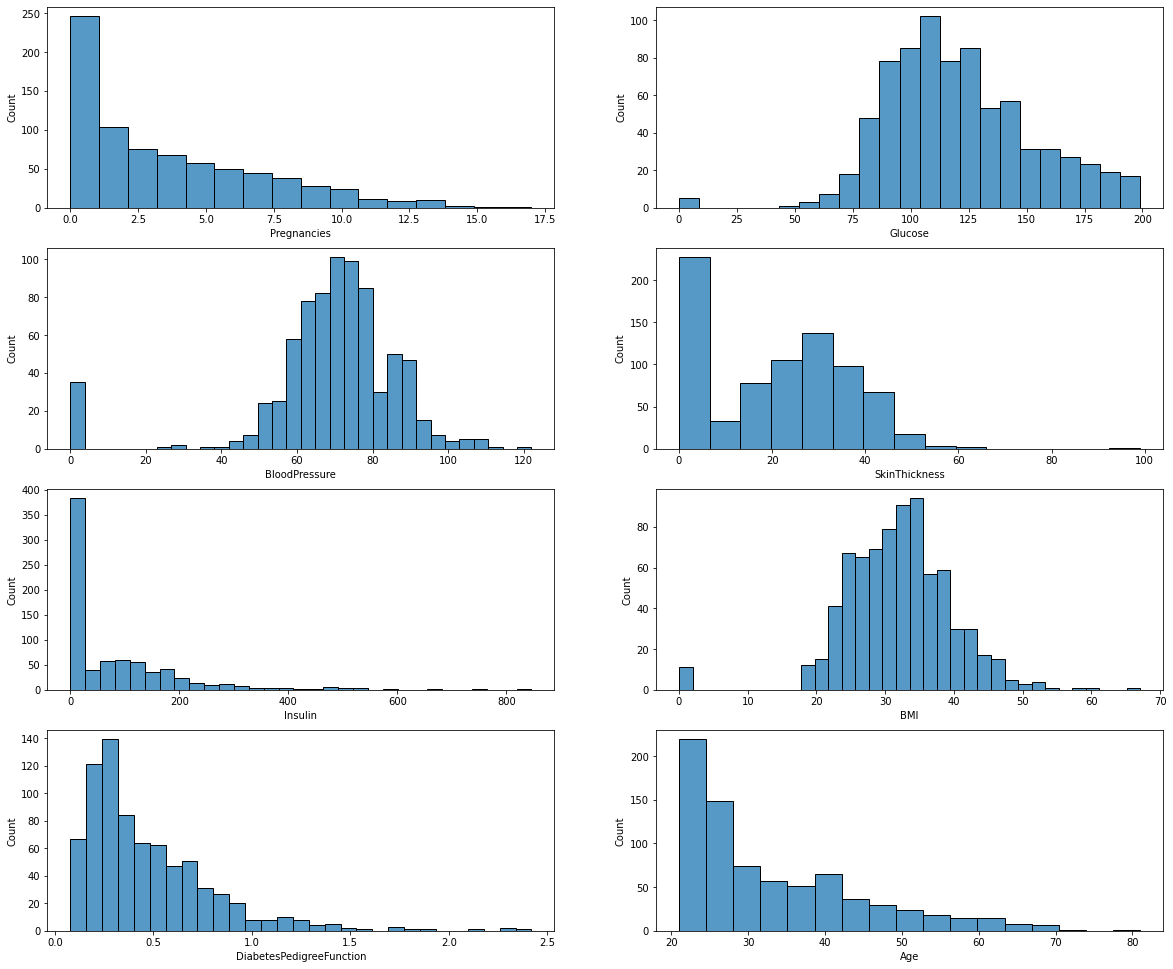

In [ ]:
#visualisation of the feactures columns
plt.figure(figsize=(20,17))
features_columns=df.columns.drop("Outcome")
for i,col in enumerate(features_columns):
  plt.subplot(4,2, i+1)
  sns.histplot(x=df[col])
  

plt.show()

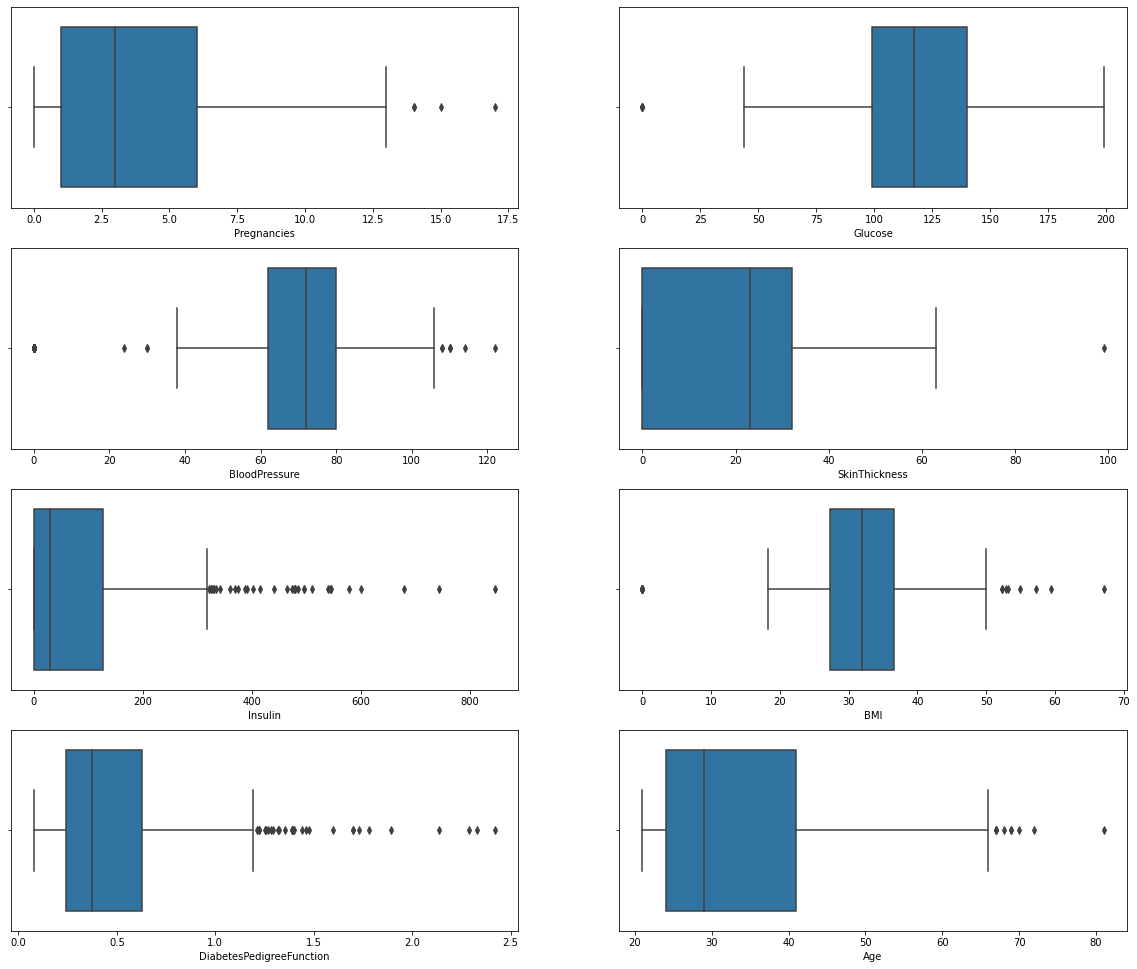

In [ ]:
#boxplot of feactures 
plt.figure(figsize=(20, 17))

for i,col in enumerate(features_columns):
  plt.subplot(4,2,i+1)
  sns.boxplot(x=df[col])
  
plt.show()

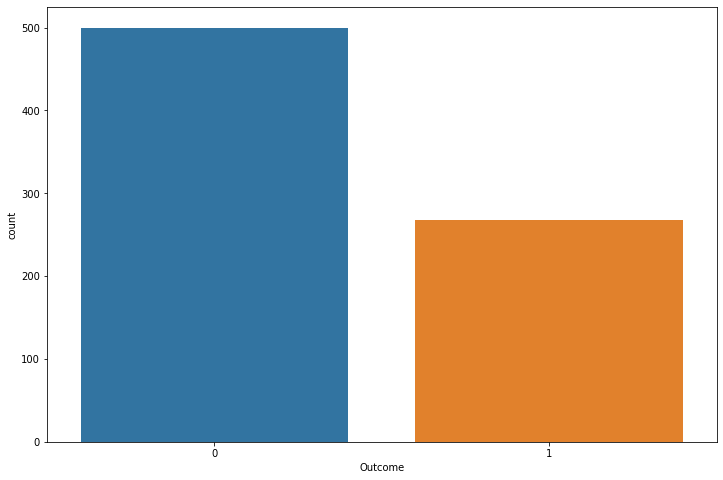

In [ ]:
#visualisation of the output feactures
plt.figure(figsize=(12,8))
sns.countplot(x=df['Outcome'])
plt.show()

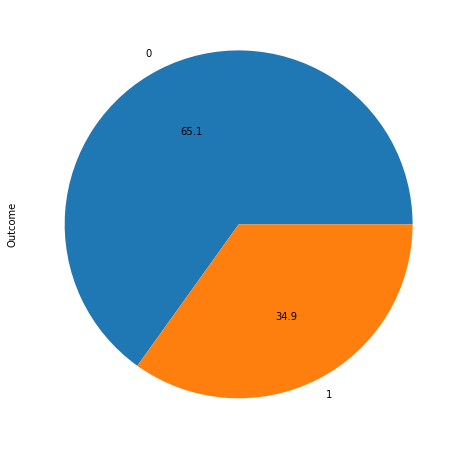

In [ ]:
#visualisation of the output feactures annother way
plt.figure(figsize=(12,8))
df['Outcome'].value_counts().plot.pie(autopct="%1.1f")


the feactures who have a many of  outlers are : Insulin,  DiabetesPedigreeFunction , BMI, Age, Glucose, Pregnancies

In [ ]:
#coloration  beetwen the feactures
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


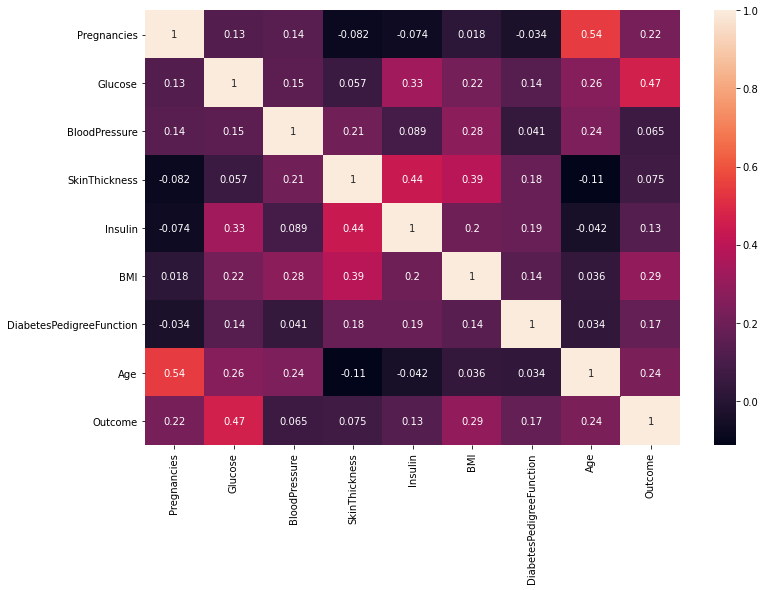

In [ ]:
#visualisation of the colartion 
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
#chearc the values columns equal to 0
columns_value_0=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for col in columns_value_0:
  df[col][df[col]==0]=np.NaN
df.isna().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.p

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
for col in columns_value_0:

  df[col].fillna(df[col].mean(),inplace=True )
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#cuting of the dataframe
X=df.drop("Outcome",axis=1).values
y=df['Outcome']

In [ ]:
#standarisation of the series
from sklearn.preprocessing import StandardScaler
standard=StandardScaler()
X_s=standard.fit_transform(X)

In [ ]:
#split of the feactures
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_s,y, test_size=0.20, random_state=0)

In [ ]:
#base line
from sklearn.linear_model import  LogisticRegression

model=LogisticRegression()
model.fit(X_train,y_train)
y_preds=model.predict(X_test)


vue que c'est le model le plus basique si il est performant alors s'a va nous permettre de ne pas utiliser des models très complexes avecs le risque de faire du overfitting 

In [ ]:
# evaluation of the model
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

print(f"accuracy: {accuracy_score(y_test,y_preds)}, precision: {precision_score(y_test,y_preds)}, recall: {recall_score(y_test,y_preds)}, f1_score: {f1_score(y_test,y_preds)}")

accuracy: 0.8116883116883117, precision: 0.7368421052631579, recall: 0.5957446808510638, f1_score: 0.6588235294117647


j'ai une precision qui est  egale au recall avec une valeur supérieur 50 donc le model il est fiable mais il est possible d'avoir peut etre une accuracy plus élévé 

In [ ]:
importante=model.coef_[0]
for i,col in enumerate(features_columns):
  print(f"{col} : {importante[i]}")

Pregnancies : 0.32304122918747014
Glucose : 1.1158876978772398
BloodPressure : -0.16330175191958723
SkinThickness : -0.03290390173787799
Insulin : -0.0990785744259844
BMI : 0.6530077200687151
DiabetesPedigreeFunction : 0.2619066059575167
Age : 0.2138321041297784


Pregnancies, Glucose,BMI ,DiabetesPedigreeFunction, Age

*** BloodPressure , SkinThickness,Insulin

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
X=df.drop(["Outcome","BloodPressure","SkinThickness","Insulin"],axis=1).values

#standarisation
standard=StandardScaler()
X_s=standard.fit_transform(X)
#division 
X_train_,X_test_,y_train_,y_test_=train_test_split(X_s,y, test_size=0.20, random_state=0)
#train model
model=LogisticRegressionCV(cv=5, scoring="recall")
model.fit(X_train_,y_train_)
y_preds=model.predict(X_test_)
#metrics score
print(f"accuracy: {accuracy_score(y_test_,y_preds)}, precision: {precision_score(y_test_,y_preds)}, recall: {recall_score(y_test_,y_preds)}, f1_score: {f1_score(y_test_,y_preds)}")

accuracy: 0.7987012987012987, precision: 0.7105263157894737, recall: 0.574468085106383, f1_score: 0.6352941176470589


In [ ]:
from sklearn.naive_bayes import GaussianNB
model_gnb=GaussianNB()
model_gnb.fit(X_train,y_train)
y_preds=model_gnb.predict(X_test)

print(f"accuracy: {accuracy_score(y_test,y_preds)}, precision: {precision_score(y_test,y_preds)}, recall: {recall_score(y_test,y_preds)}, f1_score: {f1_score(y_test,y_preds)}")

accuracy: 0.7857142857142857, precision: 0.6590909090909091, recall: 0.6170212765957447, f1_score: 0.6373626373626374


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf=RandomForestClassifier()
model_rf.fit(X_train,y_train)
y_preds=model_rf.predict(X_test)

print(f"accuracy: {accuracy_score(y_test,y_preds)}, precision: {precision_score(y_test,y_preds)}, recall: {recall_score(y_test,y_preds)}, f1_score: {f1_score(y_test,y_preds)}")

accuracy: 0.8051948051948052, precision: 0.6976744186046512, recall: 0.6382978723404256, f1_score: 0.6666666666666666


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier()
model_dt.fit(X_train,y_train)
y_preds=model_dt.predict(X_test)

print(f"accuracy: {accuracy_score(y_test,y_preds)}, precision: {precision_score(y_test,y_preds)}, recall: {recall_score(y_test,y_preds)}, f1_score: {f1_score(y_test,y_preds)}")

accuracy: 0.7337662337662337, precision: 0.5576923076923077, recall: 0.6170212765957447, f1_score: 0.5858585858585859


Non

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
model_lr=LogisticRegressionCV(cv=5, scoring="recall")
model_ng=GaussianNB()
model_fc=RandomForestClassifier()

model=VotingClassifier(estimators=[('lr',model_lr),('ng',model_ng),('fc',model_fc)])
model.fit(X_train,y_train)
y_preds=model.predict(X_test)

In [ ]:
print(f"accuracy: {accuracy_score(y_test,y_preds)}, precision: {precision_score(y_test,y_preds)}, recall: {recall_score(y_test,y_preds)}, f1_score: {f1_score(y_test,y_preds)}")

accuracy: 0.8051948051948052, precision: 0.717948717948718, recall: 0.5957446808510638, f1_score: 0.6511627906976744
